In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

In [2]:
#Load npy data

train = np.load('Data/P12Data_1/split_1/train_physionet2012_1.npy', allow_pickle=True)
test = np.load('Data/P12Data_1/split_1/test_physionet2012_1.npy', allow_pickle=True)
validation = np.load('Data/P12Data_1/split_1/validation_physionet2012_1.npy', allow_pickle=True)

In [3]:
train

array([{'ts_values': array([[ 1.04850105,  0.        ,  0.        , ...,  0.        ,
                0.        ,  0.        ],
              [ 0.        ,  0.        ,  0.        , ...,  0.        ,
                0.        ,  0.        ],
              [ 0.        ,  0.        ,  0.        , ...,  0.        ,
                0.        ,  0.        ],
              ...,
              [ 0.        ,  0.        ,  0.        , ...,  0.        ,
                0.41727864,  0.        ],
              [ 1.0080015 ,  0.        ,  0.        , ..., -0.11827794,
                0.        ,  0.        ],
              [ 1.0080015 ,  0.        ,  0.        , ..., -0.11827794,
                0.        ,  0.        ]]), 'ts_indicators': array([[ True, False, False, ..., False, False, False],
              [False, False, False, ..., False, False, False],
              [False, False, False, ..., False, False, False],
              ...,
              [False, False, False, ..., False,  True, False],


# Inspecting the Data Structure

In [45]:
# Data shape
train.shape, test.shape, validation.shape

((9590,), (1199,), (1199,))

In [63]:
# 1. General structure
print("Total samples:", len(train))
print("Keys in each sample:", train[0].keys())

Total samples: 9590
Keys in each sample: dict_keys(['ts_values', 'ts_indicators', 'ts_times', 'static', 'labels'])


In [65]:
# 2. Consistency checks on shapes
ts_values_shapes = [sample['ts_values'].shape for sample in train]
ts_indicators_shapes = [sample['ts_indicators'].shape for sample in train]
ts_times_shapes = [sample['ts_times'].shape for sample in train]
static_shapes = [sample['static'].shape for sample in train]
print("Unique shapes of ts_values across samples:", set(ts_values_shapes))
print("Unique shapes of ts_indicators across samples:", set(ts_indicators_shapes))
print("Unique shapes of ts_times across samples:", set(ts_times_shapes))
print("Unique shapes of static features:", set(static_shapes))

Unique shapes of ts_values across samples: {(43, 37), (98, 37), (164, 37), (160, 37), (56, 37), (45, 37), (111, 37), (100, 37), (34, 37), (21, 37), (155, 37), (5, 37), (60, 37), (126, 37), (113, 37), (7, 37), (18, 37), (73, 37), (62, 37), (117, 37), (139, 37), (128, 37), (183, 37), (22, 37), (77, 37), (143, 37), (75, 37), (130, 37), (13, 37), (11, 37), (79, 37), (90, 37), (101, 37), (156, 37), (35, 37), (24, 37), (145, 37), (39, 37), (92, 37), (158, 37), (52, 37), (41, 37), (107, 37), (96, 37), (118, 37), (162, 37), (1, 37), (122, 37), (54, 37), (120, 37), (109, 37), (14, 37), (3, 37), (80, 37), (69, 37), (58, 37), (124, 37), (135, 37), (190, 37), (82, 37), (71, 37), (137, 37), (203, 37), (31, 37), (20, 37), (86, 37), (97, 37), (152, 37), (141, 37), (207, 37), (44, 37), (9, 37), (88, 37), (99, 37), (165, 37), (33, 37), (154, 37), (48, 37), (103, 37), (114, 37), (94, 37), (50, 37), (61, 37), (116, 37), (105, 37), (127, 37), (37, 37), (171, 37), (10, 37), (65, 37), (76, 37), (131, 37), (

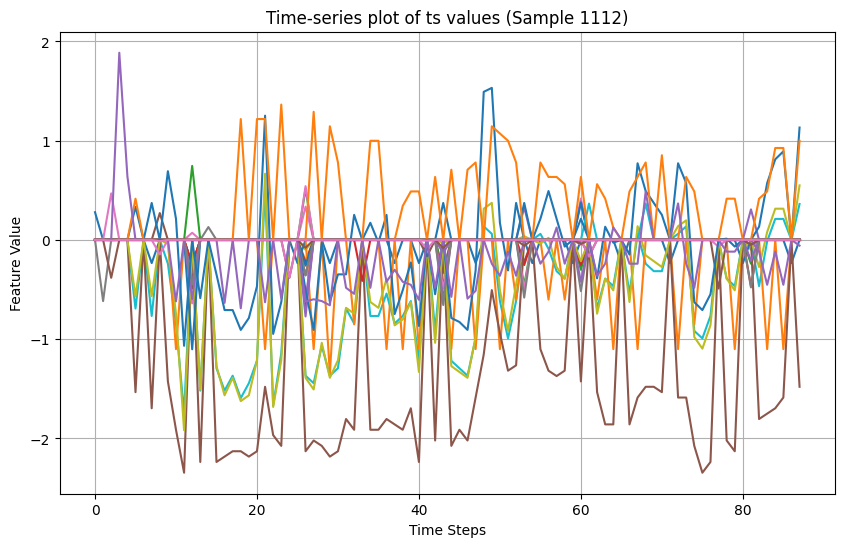

In [101]:
# Plot time-series for random sample
sample_idx = np.random.randint(len(train))
plt.figure(figsize=(10, 6))
plt.plot(train[sample_idx]['ts_values'])  # First 5 features as example
plt.title(f"Time-series plot of ts values (Sample {sample_idx})")
plt.xlabel("Time Steps")
plt.ylabel("Feature Value")
plt.grid()
plt.show()

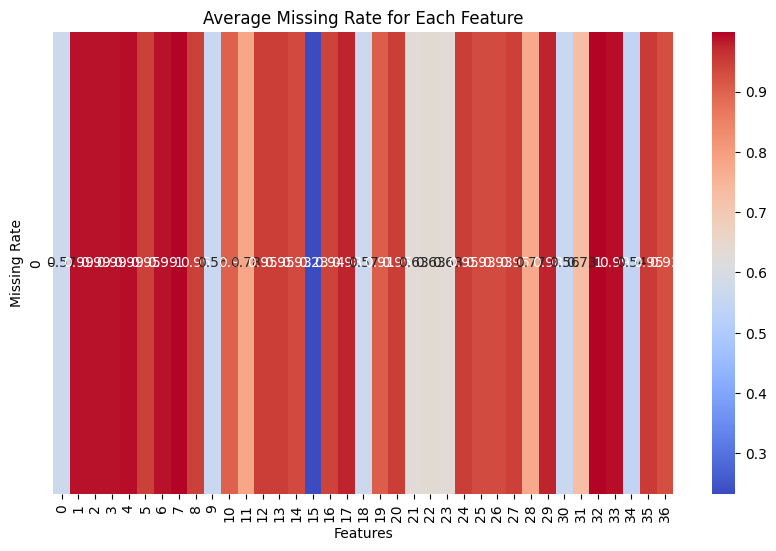

In [102]:
# 4. ts_indicators missing data analysis
all_ts_indicators = [sample['ts_indicators'] for sample in train]  # List of arrays
missing_rate = [1 - indicators.mean(axis=0) for indicators in all_ts_indicators]
avg_missing_rate = np.mean(missing_rate, axis=0)

plt.figure(figsize=(10, 6))
sns.heatmap(avg_missing_rate.reshape(1, -1), annot=True, cmap="coolwarm", cbar=True)
plt.title("Average Missing Rate for Each Feature")
plt.xlabel("Features")
plt.ylabel("Missing Rate")
plt.show()

In [105]:
# 5. ts_times consistency check
all_ts_times = [sample['ts_times'] for sample in train]
time_diffs = [np.diff(times) for times in all_ts_times]  # Time interval differences
avg_time_diff = np.mean([np.mean(diffs) for diffs in time_diffs])

print("Average time difference between time steps:", avg_time_diff)

Average time difference between time steps: nan


d:\PP002_PhD_AI4TSN\DTU02456_Deep_Learning\Project\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\PP002_PhD_AI4TSN\DTU02456_Deep_Learning\Project\.venv\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


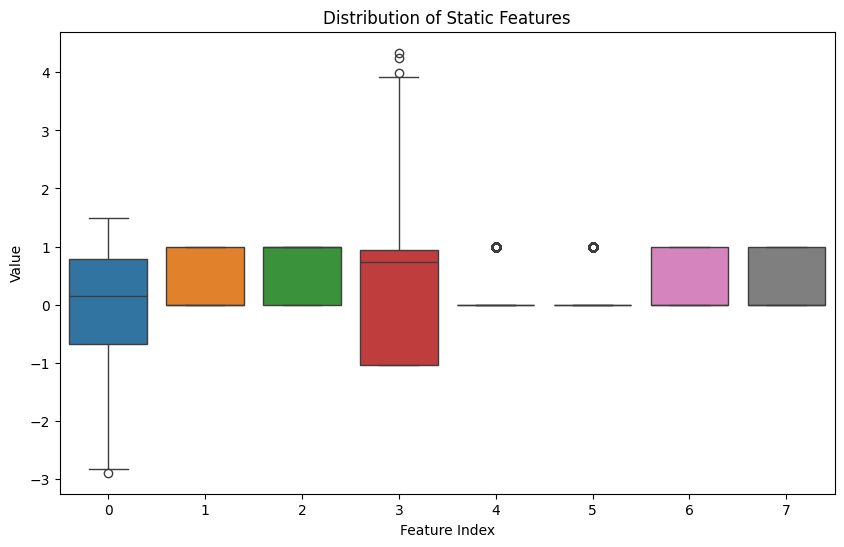

In [106]:
# 6. Static features distribution
static_data = np.array([sample['static'] for sample in train])  # Shape: (num_samples, 8)
plt.figure(figsize=(10, 6))
sns.boxplot(data=static_data)
plt.title("Distribution of Static Features")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.show()

In [107]:
# 7. Labels distribution
labels = np.array([sample['labels'] for sample in train])
label_counts = Counter(labels)
print("Class distribution of labels:", label_counts)

Class distribution of labels: Counter({np.int64(0): 8248, np.int64(1): 1342})


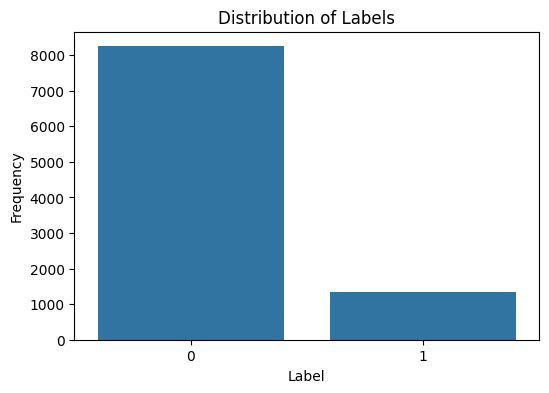

In [108]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=labels)
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()

In [110]:
# Sample from the data
sample = train[0]

In [111]:
# Check basic information
print("Keys in each sample:", sample.keys())
print("Shape of ts_values:", sample['ts_values'].shape)
print("Shape of indicators:", sample['ts_indicators'].shape)
print("Shape of ts_times:", sample['ts_times'].shape)
print("Shape of static:", sample['static'].shape)
print("Label:", sample['labels'].shape)

Keys in each sample: dict_keys(['ts_values', 'ts_indicators', 'ts_times', 'static', 'labels'])
Shape of ts_values: (74, 37)
Shape of indicators: (74, 37)
Shape of ts_times: (74,)
Shape of static: (8,)
Label: ()


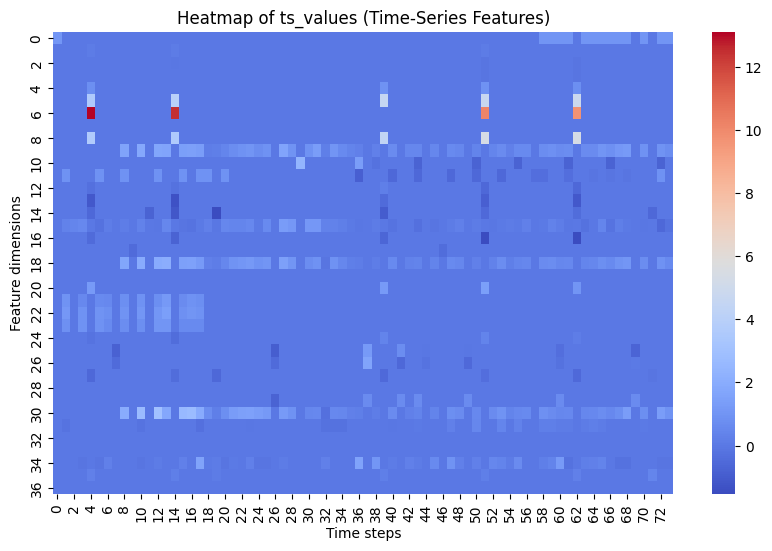

In [112]:
# ts_values analysis
ts_values = sample['ts_values']
plt.figure(figsize=(10, 6))
sns.heatmap(ts_values.T, cmap='coolwarm', cbar=True)
plt.title("Heatmap of ts_values (Time-Series Features)")
plt.xlabel("Time steps")
plt.ylabel("Feature dimensions")
plt.show()

Overall missing value percentage: 84.40%


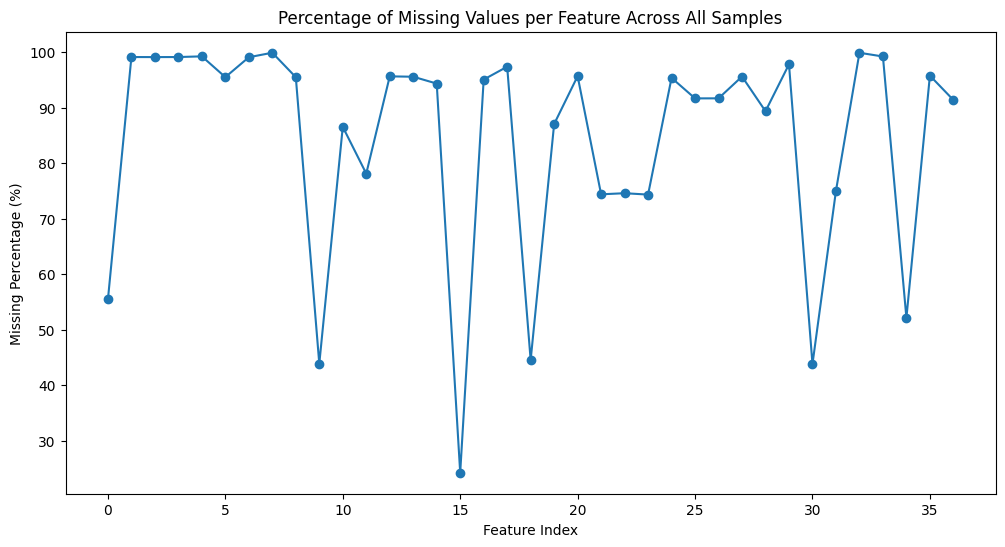

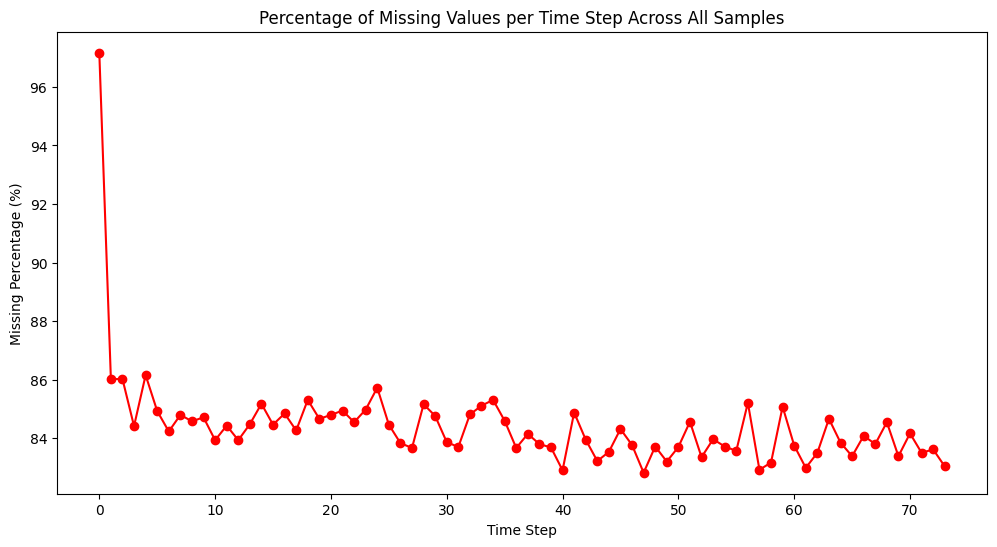

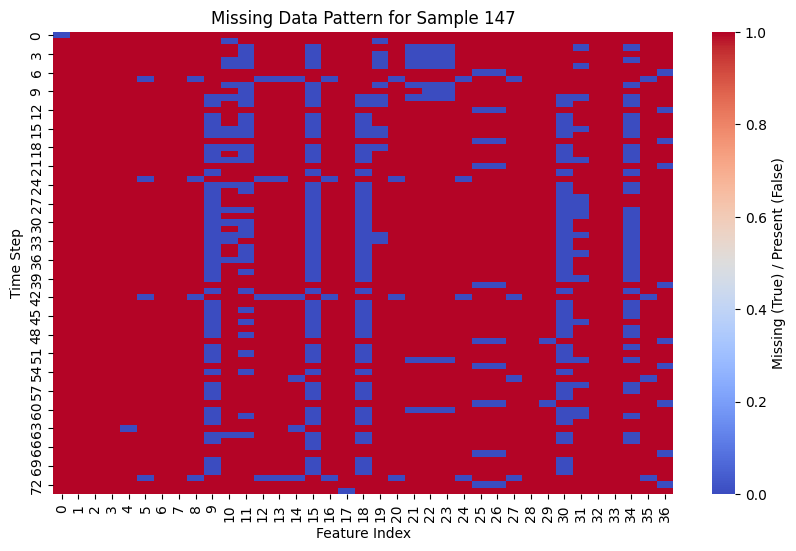

In [117]:
# Filter `ts_indicators` for samples with consistent shape (74, 37)
target_shape = (74, 37)
filtered_ts_indicators = [sample['ts_indicators'] for sample in train if sample['ts_indicators'].shape == target_shape]

# 1. Overall missing value percentage
total_values = np.prod(target_shape) * len(filtered_ts_indicators)
total_present = sum(indicator.sum() for indicator in filtered_ts_indicators)
total_missing_percentage = 100 * (1 - total_present / total_values)
print(f"Overall missing value percentage: {total_missing_percentage:.2f}%")

# 2. Percentage of missing values per feature across all samples
feature_missing_percentage = np.mean([1 - indicator.mean(axis=0) for indicator in filtered_ts_indicators], axis=0) * 100
plt.figure(figsize=(12, 6))
plt.plot(feature_missing_percentage, marker='o')
plt.title("Percentage of Missing Values per Feature Across All Samples")
plt.xlabel("Feature Index")
plt.ylabel("Missing Percentage (%)")
plt.show()

# 3. Percentage of missing values per time step across all samples
time_step_missing_percentage = np.mean([1 - indicator.mean(axis=1) for indicator in filtered_ts_indicators], axis=0) * 100
plt.figure(figsize=(12, 6))
plt.plot(time_step_missing_percentage, marker='o', color='red')
plt.title("Percentage of Missing Values per Time Step Across All Samples")
plt.xlabel("Time Step")
plt.ylabel("Missing Percentage (%)")
plt.show()

# 4. Heatmap of missing data pattern for a sample
sample_idx = np.random.randint(len(filtered_ts_indicators))
plt.figure(figsize=(10, 6))
sns.heatmap(~filtered_ts_indicators[sample_idx], cmap="coolwarm", cbar=True, cbar_kws={'label': 'Missing (True) / Present (False)'})
plt.title(f"Missing Data Pattern for Sample {sample_idx}")
plt.xlabel("Feature Index")
plt.ylabel("Time Step")
plt.show()


Basic Statistics of ts_times:
Minimum time: 0.0
Maximum time: 47.18333435058594
Mean time: 22.74684715270996
Standard deviation of time: 13.56053352355957

Statistics of Time Step Differences:
Mean interval: 0.6463470458984375
Standard deviation of intervals: 0.3470495939254761
Minimum interval: 0.03333282470703125
Maximum interval: 1.0000019073486328


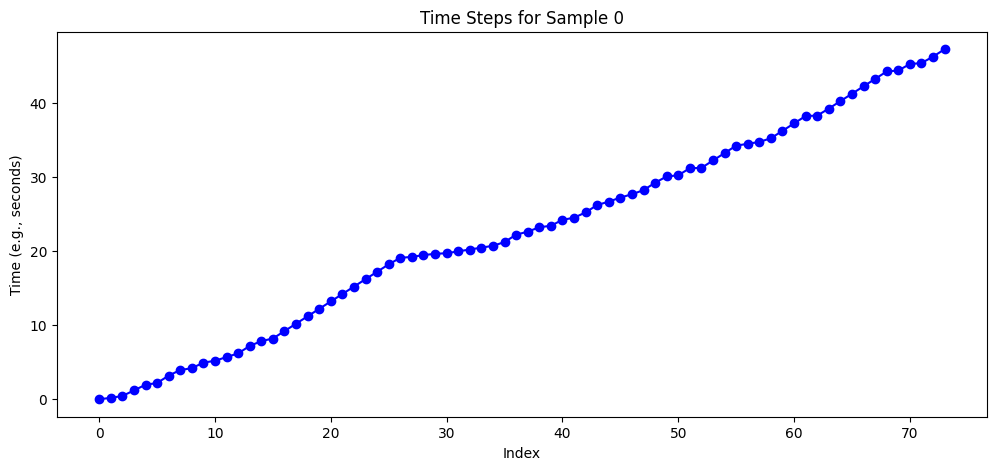

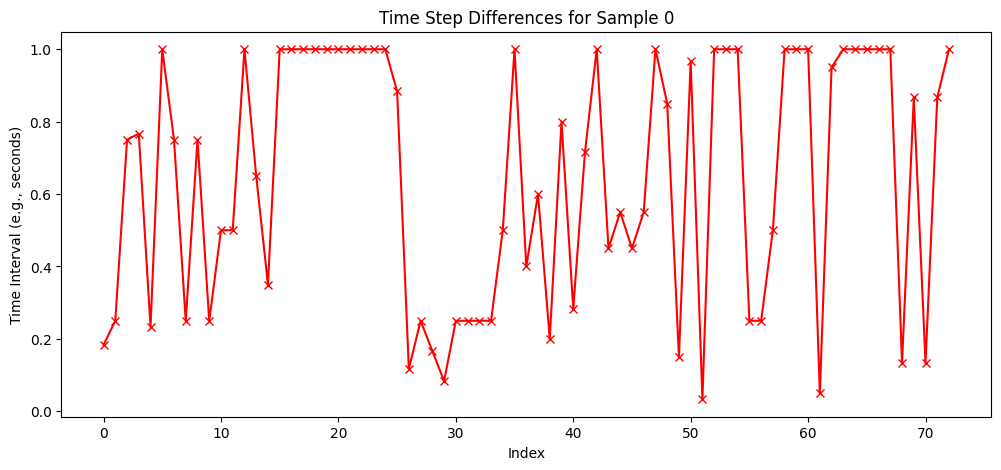

In [121]:
# Choose a sample and get its ts_times
sample_idx = 0  # Change this to analyze other samples
ts_times = train[sample_idx]['ts_times']

# 1. Basic statistics
print("Basic Statistics of ts_times:")
print(f"Minimum time: {np.min(ts_times)}")
print(f"Maximum time: {np.max(ts_times)}")
print(f"Mean time: {np.mean(ts_times)}")
print(f"Standard deviation of time: {np.std(ts_times)}")

# 2. Time step differences
time_diffs = np.diff(ts_times)
print("\nStatistics of Time Step Differences:")
print(f"Mean interval: {np.mean(time_diffs)}")
print(f"Standard deviation of intervals: {np.std(time_diffs)}")
print(f"Minimum interval: {np.min(time_diffs)}")
print(f"Maximum interval: {np.max(time_diffs)}")

# 3. Visualizations

# Plotting the time steps to see their progression
plt.figure(figsize=(12, 5))
plt.plot(ts_times, marker='o', linestyle='-', color='b')
plt.title(f"Time Steps for Sample {sample_idx}")
plt.xlabel("Index")
plt.ylabel("Time (e.g., seconds)")
plt.show()

# Plotting time intervals to see consistency
plt.figure(figsize=(12, 5))
plt.plot(time_diffs, marker='x', linestyle='-', color='r')
plt.title(f"Time Step Differences for Sample {sample_idx}")
plt.xlabel("Index")
plt.ylabel("Time Interval (e.g., seconds)")
plt.show()

Basic Statistics for Each Feature:
       Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
count  74.000000  74.000000  74.000000  74.000000  74.000000  74.000000   
mean    0.191250   0.002717  -0.004483  -0.003931   0.045946   0.292769   
std     0.398654   0.016424   0.022169   0.020804   0.194346   1.101734   
min     0.000000  -0.035741  -0.131791  -0.126485   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
max     1.048501   0.091884   0.000000   0.000000   0.926499   4.828999   

       Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_27  \
count  74.000000       74.0  74.000000  74.000000  ...   74.000000   
mean    0.614052        0.0   0.300625   0.553594  ...   -0.041993   
std     2.608543        0.0   1.142558   0.522025  ...    0.139392   
min     0

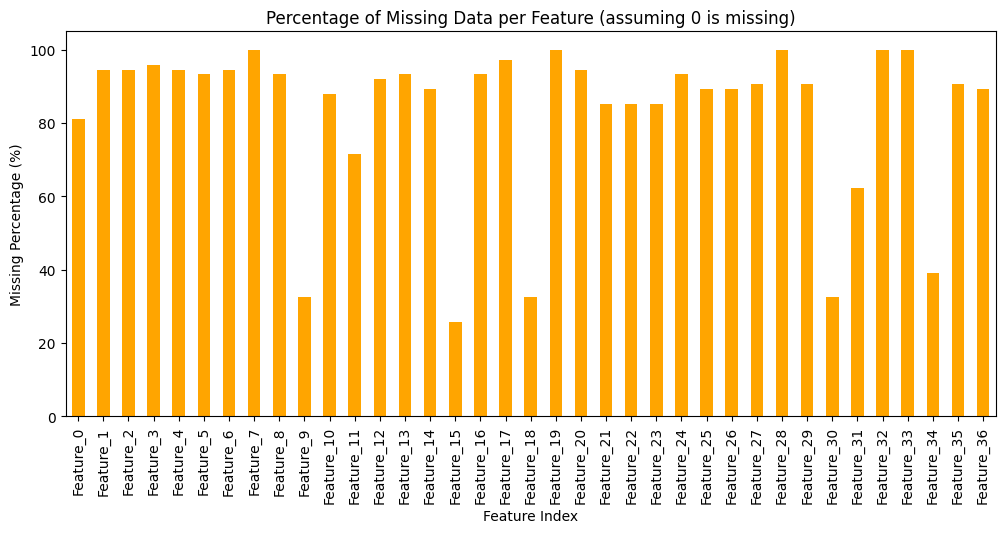

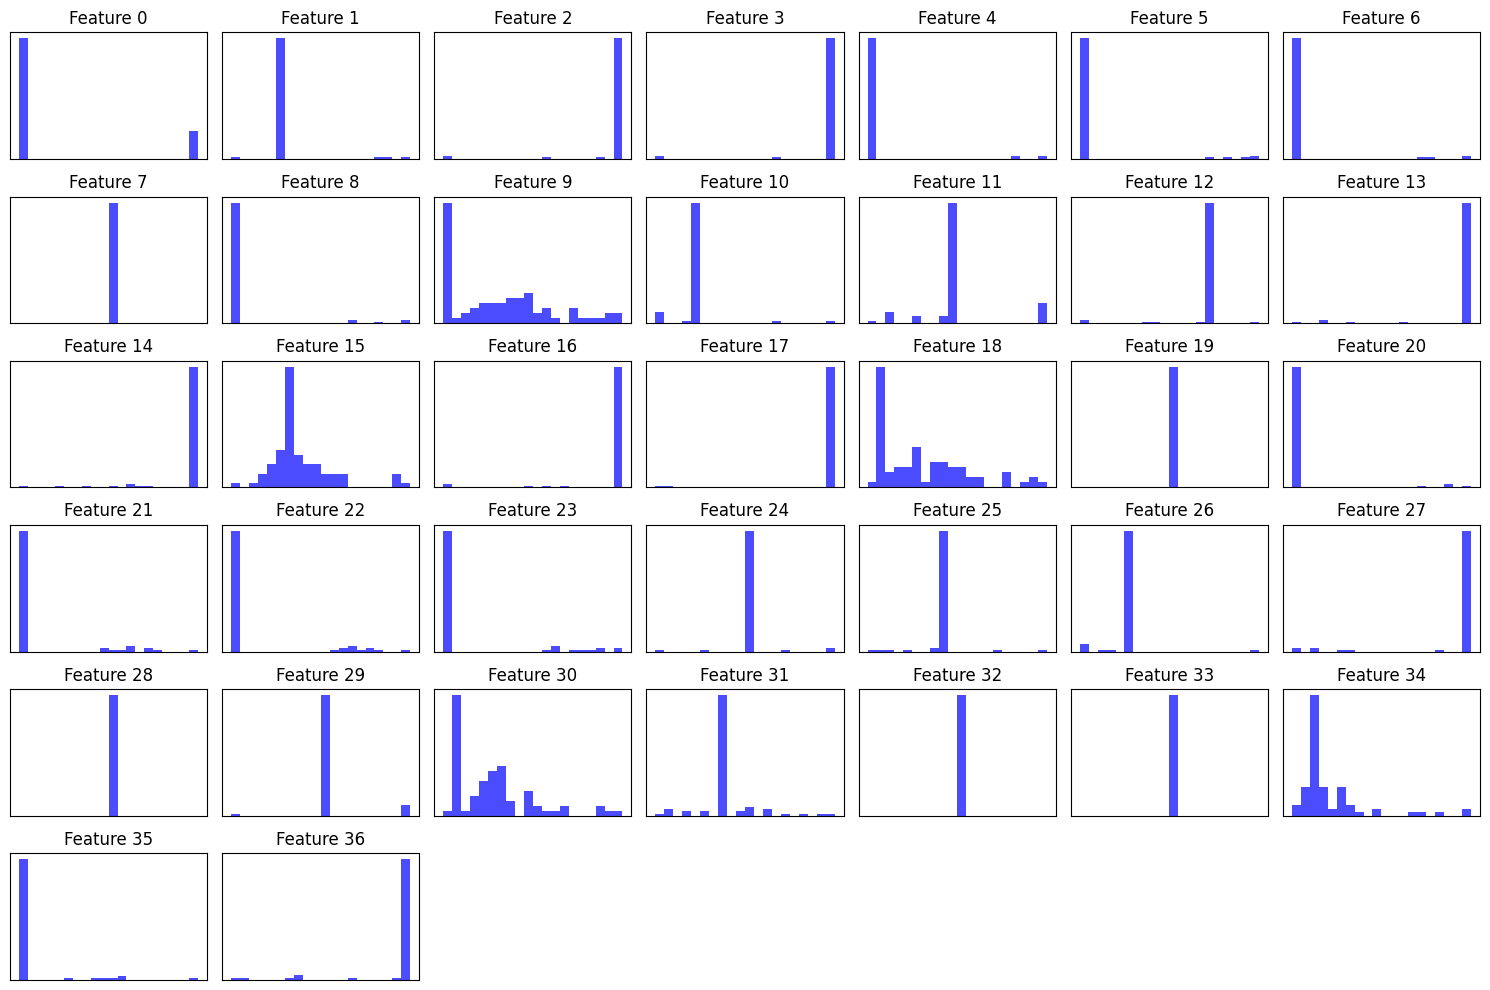

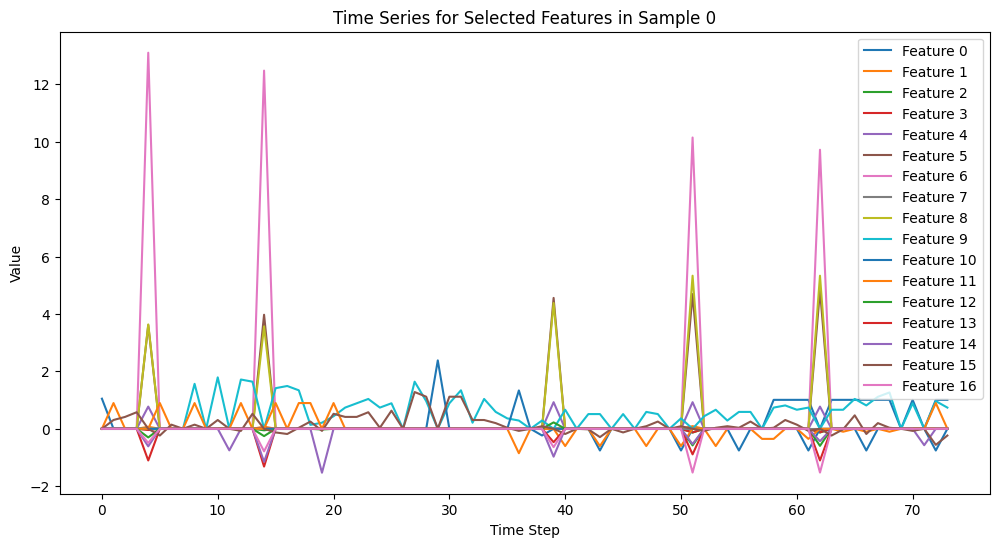

In [124]:
# Select a sample and extract ts_values
sample_idx = 0  # Change this to analyze other samples if needed
ts_values = train[sample_idx]['ts_values']

# Convert ts_values to a DataFrame for easier analysis
df_ts_values = pd.DataFrame(ts_values, columns=[f"Feature_{i}" for i in range(ts_values.shape[1])])

# 1. Basic statistics for each feature
print("Basic Statistics for Each Feature:")
feature_stats = df_ts_values.describe()
print(feature_stats)

# 2. Missing data analysis (assuming 0 as missing indicator)
missing_percentage = (df_ts_values == 0).mean() * 100  # Adjust if NaNs are used for missing values
print("\nMissing Data Percentage per Feature (assuming 0 is missing):")
print(missing_percentage)

# Plot missing data percentage for each feature
plt.figure(figsize=(12, 5))
missing_percentage.plot(kind='bar', color='orange')
plt.title("Percentage of Missing Data per Feature (assuming 0 is missing)")
plt.xlabel("Feature Index")
plt.ylabel("Missing Percentage (%)")
plt.show()

# 3. Distribution analysis
plt.figure(figsize=(15, 10))
for i in range(ts_values.shape[1]):
    plt.subplot(6, 7, i + 1)  # Adjust rows/columns if needed for better visualization
    plt.hist(df_ts_values[f"Feature_{i}"], bins=20, color='blue', alpha=0.7)
    plt.title(f"Feature {i}")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

# 4. Trend analysis over time for selected features
selected_features = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]  # Change as needed to visualize other features
plt.figure(figsize=(12, 6))
for feature in selected_features:
    plt.plot(df_ts_values[f"Feature_{feature}"], label=f"Feature {feature}")
plt.title(f"Time Series for Selected Features in Sample {sample_idx}")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.show()

Static Feature Values for the Sample:
   Static_Feature_0  Static_Feature_1  Static_Feature_2  Static_Feature_3  \
0         -1.785023               0.0               1.0          1.063986   

   Static_Feature_4  Static_Feature_5  Static_Feature_6  Static_Feature_7  
0               0.0               0.0               0.0               1.0  
Static_Feature_2 is binary: 1.0
Static_Feature_6 is binary: 0.0

Basic Statistics Across All Samples for Static Features:
       Static_Feature_0  Static_Feature_1  Static_Feature_2  Static_Feature_3  \
count       9590.000000       9590.000000       9590.000000       9590.000000   
mean          -0.000684          0.435349          0.563712         -0.000646   
std            1.000376          0.495829          0.495950          1.000041   
min           -2.896097          0.000000          0.000000         -1.041340   
25%           -0.673950          0.000000          0.000000         -1.041340   
50%            0.144735          0.000000      

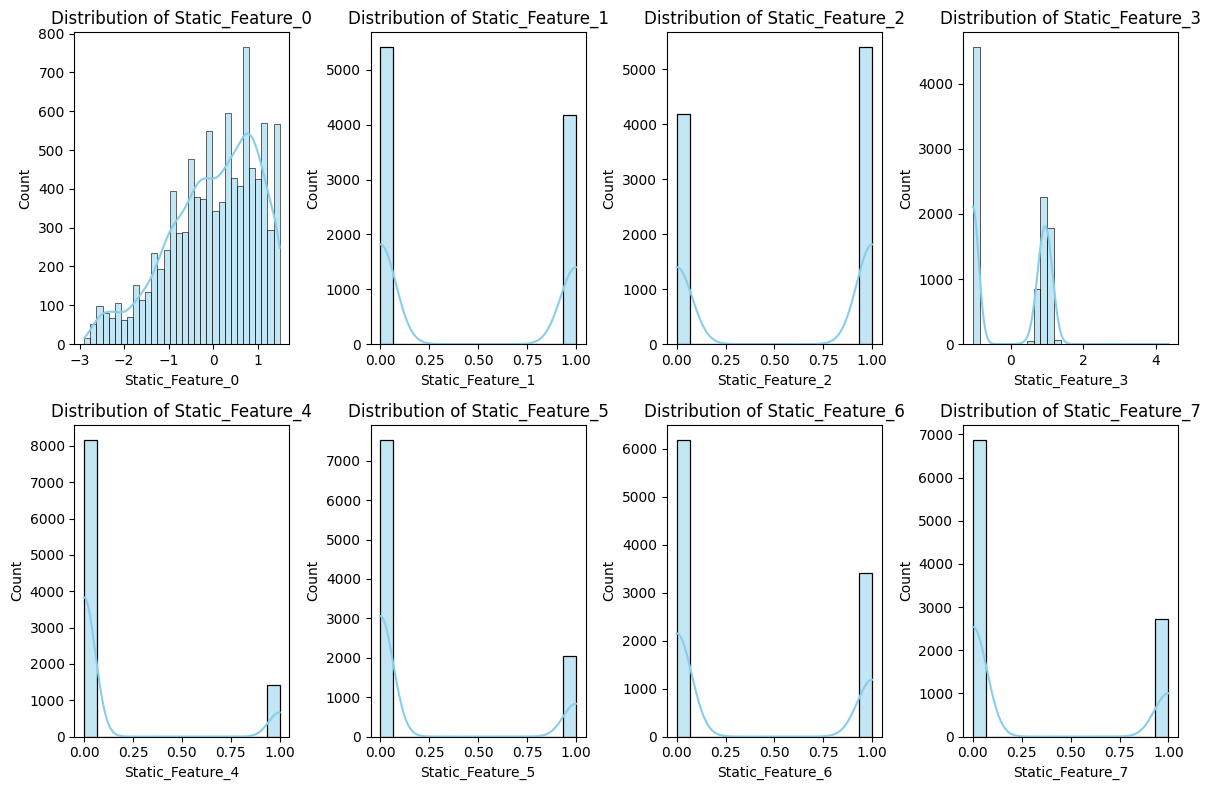

In [126]:
# Extract ts_static from a single sample
sample_idx = 0  # Change index to analyze other samples if desired
ts_static = train[sample_idx]['static']

# Convert to DataFrame for easier manipulation
df_ts_static = pd.DataFrame([ts_static], columns=[f'Static_Feature_{i}' for i in range(len(ts_static))])

# 1. Basic statistics
print("Static Feature Values for the Sample:")
print(df_ts_static)

# 2. Feature interpretation and range checking (example code if known ranges exist)
# Example: Check if a feature is binary (values in {0, 1})
binary_features = [2, 6]  # Assuming features at index 2 and 6 should be binary
for feature in binary_features:
    value = ts_static[feature]
    print(f"Static_Feature_{feature} is {'binary' if value in [0, 1] else 'not binary'}: {value}")

# 3. Distribution analysis across all samples (for a more comprehensive view)
# Extract all samples' ts_static and convert to DataFrame
all_static_features = np.array([sample['static'] for sample in train])  # Shape: (num_samples, 8)
df_all_static = pd.DataFrame(all_static_features, columns=[f'Static_Feature_{i}' for i in range(all_static_features.shape[1])])

# Overall statistics across all samples
print("\nBasic Statistics Across All Samples for Static Features:")
print(df_all_static.describe())

# Plot distributions of static features across all samples
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_all_static.columns):
    plt.subplot(2, 4, i + 1)  # Assuming 8 features, adjust subplot layout as needed
    sns.histplot(df_all_static[column], kde=True, color='skyblue')
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()